# ML MODELS FOR EMG CLASSIFICATION

# Importing the libraries

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Importing the dataset

In [3]:
# Importing the train_set
train_dataset = pd.read_csv('trainset_60.csv')
X_train = train_dataset.iloc[:, :-1].values
y_train = train_dataset.iloc[:, -1].values

In [4]:
# Importing the dev_set
dev_dataset = pd.read_csv('validate_20.csv')
X_dev = dev_dataset.iloc[:, :-1].values
y_dev = dev_dataset.iloc[:, -1].values

In [5]:
# Importing the test_set
test_dataset = pd.read_csv('testset_20.csv')
X_test = test_dataset.iloc[:, :-1].values
y_test = test_dataset.iloc[:, -1].values

# Feature Scaling

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_dev = sc.fit_transform(X_dev)
X_test = sc.transform(X_test)

# Dataset Analysis

In [7]:
print(X_train)

[[-1.90815765 -2.07145225 -1.65976075 ...  0.28777429  0.10169213
  -1.28297814]
 [-1.54060044 -1.75309426 -1.23159258 ...  0.48136172 -0.06873272
  -1.59648631]
 [-1.57129911 -2.08981807 -1.46895219 ...  0.27404184 -0.73910521
  -0.12443136]
 ...
 [ 2.13391584  1.78339061  2.18649685 ... -0.3352874   0.51414358
  -1.78324017]
 [ 1.67669939  1.44978949  1.9996626  ...  0.09095603  0.40732187
  -1.40817977]
 [ 1.67393146  1.64460677  2.12679152 ...  0.09353653  0.32284431
  -2.13229583]]


In [8]:
print(X_dev)

[[-1.61878804 -1.96346788 -1.51493239 ...  0.42753289 -0.58065494
  -1.47258398]
 [-1.11283496 -2.08258309 -1.4206058  ...  0.42297098 -0.13847814
  -0.29632955]
 [-0.91098495 -1.98802451 -1.42193222 ...  0.29841291  0.37169066
  -0.88285218]
 ...
 [ 1.87246561  2.00294689  2.3221959  ... -0.08439382  0.33340883
  -2.70096261]
 [ 1.64101472  1.78724614  2.54077962 ... -0.55195137  0.22116299
  -1.68610678]
 [ 1.59631904  1.61827611  2.17404237 ... -0.06295117  0.25410034
  -1.93063644]]


In [9]:
print(X_test)

[[-0.91792421 -1.83075678 -1.4311876  ...  0.20600426  0.34229093
  -1.17610739]
 [-0.84517292 -1.92407844 -1.40438908 ...  0.25326965 -0.85664689
  -1.03121374]
 [-1.35877182 -2.07581788 -1.40230985 ...  0.43330661 -0.30244812
  -1.47309306]
 ...
 [ 1.61851352  1.40961467  2.12820158 ...  0.03408372  0.15318471
  -2.18941563]
 [ 1.66925428  1.64115399  2.33362096 ... -0.31589099  0.55278223
  -2.17871956]
 [ 1.9255842   1.62686538  2.61796835 ...  0.08216561  0.47762526
  -1.65086725]]


In [10]:
np.shape(X_train)

(19776, 42)

In [11]:
np.shape(X_dev)

(7040, 42)

In [12]:
np.shape(X_test)

(7040, 42)

In [13]:
np.shape(y_train)

(19776,)

In [14]:
y_train

array([1, 1, 1, ..., 8, 8, 8], dtype=int64)

In [15]:
np.shape(y_dev)

(7040,)

In [16]:
np.shape(y_test)

(7040,)

In [17]:
y_test

array([1, 1, 1, ..., 8, 8, 8], dtype=int64)

# 1. SVM Classifier

# MODEL TUNING

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'C': [1,10,100,1000], 'kernel': ['rbf'],'gamma': ['scale','auto', 0.00001, 0.0001, 0.001]},
             {'C': [1,10,100,1000], 'kernel': ['linear']},
             {'C': [1,10,100,1000], 'kernel': ['poly'],'degree': [2,3,5],'gamma': ['scale', 'auto', 0.00001, 0.0001, 0.001]},
             {'C': [1,10,100,1000], 'kernel': ['sigmoid'],'gamma': ['scale', 'auto', 0.00001, 0.0001, 0.001]}]          
             

print("# Tuning hyper-parameters for SVC")
print()

clf = GridSearchCV(SVC(random_state = 0), tuned_parameters, scoring='accuracy', cv = 2)

clf.fit(X_train, y_train)

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full training set.")
print("The scores are computed on the full development set.")
print()
y_true, y_pred = y_dev, clf.predict(X_dev)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for SVC

Best parameters set found on training set:

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

Grid scores on training set:

0.771 (+/-0.064) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.771 (+/-0.063) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.355 (+/-0.095) for {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.728 (+/-0.012) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.756 (+/-0.027) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.775 (+/-0.068) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.775 (+/-0.068) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.728 (+/-0.013) for {'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}
0.754 (+/-0.029) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.769 (+/-0.009) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.778 (+/-0.073) for {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.779 (+/-0.073) for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.754 (+/-0.029) for {'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}
0.76

In [17]:
#model was tuned to check for best params and it was found that among all the Kernels checked the rbf kernel 
#had the best accuracy while predicting on Development set
#Best parameters set found on development set:
          #{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

# Modified Training Set

In [18]:
#TRAINING DATA(for final model): X_train_ovr: X_train + X_dev, y_train_ovr=y_train+y_dev
#TEST DATA: X_test,y_test
X_train_ovr = np.concatenate((X_train,X_dev),0)
y_train_ovr = np.concatenate((y_train,y_dev),0)

In [19]:
np.shape(X_train_ovr)

(26816, 42)

In [20]:
np.shape(y_train_ovr)

(26816,)

# Training with tuned parameters

In [21]:
# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'rbf', C = 100, gamma= 'auto', class_weight = 'balanced', random_state = 0)
classifier_SVM.fit(X_train_ovr, y_train_ovr)

SVC(C=100, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# Predicting results for Test Set

In [22]:
# Predicting the Test set results
y_results_SVM = classifier_SVM.predict(X_test)

In [23]:
print(np.concatenate((y_results_SVM.reshape(len(y_results_SVM),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [8 8]
 [8 8]
 [8 8]]


# Model Evaluation

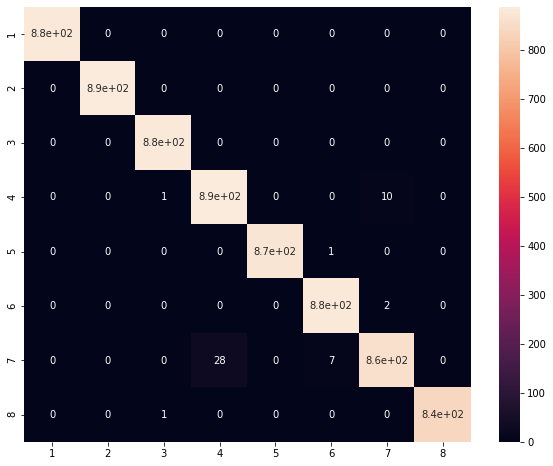

In [24]:
#Cross Validation metrics
from sklearn.metrics import confusion_matrix
    
#confusion matrix   
cm_svm = confusion_matrix(y_test, y_results_SVM)
array = cm_svm 
df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [25]:
#accuracy_score, f1_score, recall_score,precision_score metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score
#accuracy
accuracy_svm = accuracy_score(y_test, y_results_SVM)
print("accuracy:{}".format(accuracy_svm))

#F1 score    
f1_score_svm = f1_score(y_test, y_results_SVM, average='micro')
print("f1_score:{}".format(f1_score_svm))

#Recall score
recall_score_svm = recall_score(y_test, y_results_SVM, average='micro')
print("recall_score:{}".format(recall_score_svm))

#Precision score
precision_score_svm = precision_score(y_test, y_results_SVM, average='micro')
print("precision_score:{}".format(precision_score_svm))

accuracy:0.9928977272727273
f1_score:0.9928977272727273
recall_score:0.9928977272727273
precision_score:0.9928977272727273


In [26]:
#classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_results_SVM, digits = 8))

              precision    recall  f1-score   support

           1  1.00000000 1.00000000 1.00000000       879
           2  1.00000000 1.00000000 1.00000000       888
           3  0.99772727 1.00000000 0.99886234       878
           4  0.96936543 0.98773690 0.97846494       897
           5  1.00000000 0.99885584 0.99942759       874
           6  0.99100112 0.99773499 0.99435666       883
           7  0.98628571 0.96102450 0.97349126       898
           8  1.00000000 0.99881376 0.99940653       843

    accuracy                      0.99289773      7040
   macro avg  0.99304744 0.99302075 0.99300116      7040
weighted avg  0.99293521 0.99289773 0.99288291      7040



# 2. SGD Classifier

# Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier

# Set the parameters by cross-validation
tuned_parameters = [{"alpha" : [0.0001, 0.001, 0.01, 0.1], 'loss': ["hinge"],"penalty" : ["l2", "l1"],
                     "max_iter" : [1000]},
                    {"alpha" : [0.0001, 0.001, 0.01, 0.1], 'loss': ["log"], "penalty" : ["l2", "l1"],
                    "max_iter" : [1000]},
                    {"alpha" : [0.0001, 0.001, 0.01, 0.1], 'loss': ["perceptron"],"penalty" : ["l2", "l1"],
                    "max_iter" : [ 1000]},
                    {"alpha" : [0.0001, 0.001, 0.01, 0.1], 'loss': ["squared_hinge"],"penalty" : ["l2", "l1"],
                    "max_iter" : [1000]},
                    {"alpha" : [0.0001, 0.001, 0.01, 0.1], 'loss': ["modified_huber"],"penalty" : ["l2", "l1"],
                    "max_iter" : [1000]}]

print("# Tuning hyper-parameters for SGD Classifier")
print()

clf = GridSearchCV(SGDClassifier(random_state = 0), tuned_parameters, scoring='accuracy', cv = 2)

clf.fit(X_train, y_train)

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full training set.")
print("The scores are computed on the full development set.")
print()
y_true, y_pred = y_dev, clf.predict(X_dev)
print(classification_report(y_true, y_pred))
print()

In [ ]:
#Best parameters set found on training set:
#{'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l1'}

# Training with tuned parameters

In [27]:
# Training the SGD Classification model on the Training set
from sklearn.linear_model import SGDClassifier
classifier_SGD = SGDClassifier(loss= 'log', penalty='l1', alpha=0.001, max_iter= 1000, random_state = 0)
classifier_SGD.fit(X_train_ovr, y_train_ovr)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

# Prediction on TestSet

In [28]:
# Predicting the Test set results
y_results_SGD = classifier_SGD.predict(X_test)

In [29]:
print(np.concatenate((y_results_SGD.reshape(len(y_results_SGD),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [8 8]
 [8 8]
 [8 8]]


# Model Evaluation

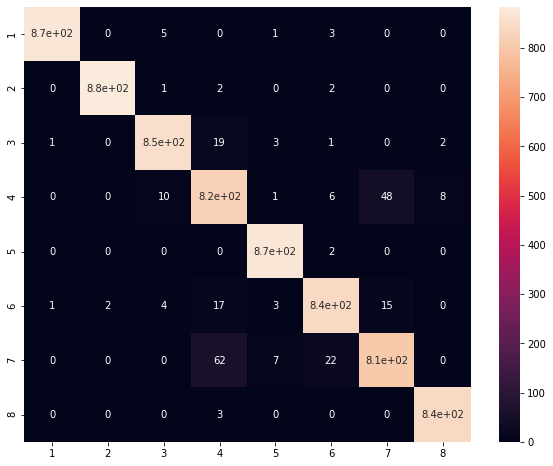

In [30]:
#confusion matrix
from sklearn.metrics import confusion_matrix
    
#confusion matrix   
cm_sgd = confusion_matrix(y_test, y_results_SGD)
array = cm_sgd
df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)


In [31]:
#accuracy_score, f1_score, recall_score,precision_score metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score
#accuracy
accuracy_sgd = accuracy_score(y_test, y_results_SGD)
print("accuracy:{}".format(accuracy_sgd))
#F1 score    
f1_score_sgd = f1_score(y_test, y_results_SGD, average='weighted')
print("f1_score:{}".format(f1_score_sgd))
#Recall score
recall_score_sgd = recall_score(y_test, y_results_SGD, average='micro')
print("recall_score:{}".format(recall_score_sgd))
#Precision score
precision_score_sgd = precision_score(y_test, y_results_SGD, average='micro')
print("precision_score:{}".format(precision_score_sgd))

accuracy:0.9643465909090909
f1_score:0.9643576440234586
recall_score:0.9643465909090909
precision_score:0.9643465909090909


In [32]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_results_SGD, digits = 8))

              precision    recall  f1-score   support

           1  0.99770642 0.98976109 0.99371788       879
           2  0.99774011 0.99436937 0.99605189       888
           3  0.97706422 0.97038724 0.97371429       878
           4  0.88888889 0.91861761 0.90350877       897
           5  0.98308906 0.99771167 0.99034639       874
           6  0.95895097 0.95243488 0.95568182       883
           7  0.92758621 0.89866370 0.91289593       898
           8  0.98823529 0.99644128 0.99232132       843

    accuracy                      0.96434659      7040
   macro avg  0.96490765 0.96479836 0.96477979      7040
weighted avg  0.96451722 0.96434659 0.96435764      7040



# 3. Logistic Regression Classifier

# Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Set the parameters by cross-validation
tuned_parameters = [{ "solver" : ['newton-cg'],"C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000],"max_iter":[250,500,1000,1500,2000]}]
             

print("# Tuning hyper-parameters for Logistic Regression Classifier")
print()

clf = GridSearchCV(LogisticRegression(random_state = 0, max_iter = 1500), tuned_parameters, scoring='accuracy', cv = 2)

clf.fit(X_train, y_train)

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full training set.")
print("The scores are computed on the full development set.")
print()
y_true, y_pred = y_dev, clf.predict(X_dev)
print(classification_report(y_true, y_pred))
print()

In [34]:
#Best parameters set found on training set:
      #{'C': 0.1, 'max_iter': 250, 'solver': 'newton-cg'}
    
#Note:
#reason for dropping other solvers
        #‘lbfgs’,‘sag’,‘saga’ : during earlier grid searches these solvers could not converge for feasible max_iters values
        #‘liblinear’: ‘liblinear’ is limited to one-versus-rest schemes and is not suitable in handling handle multinomial loss
                       # so not used in this multi-class problem

# Training the Model with tuned parameters

In [33]:
# Training the Logistic Regression classfication model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(C= 0.1, penalty='l2', solver= 'newton-cg', max_iter= 250, random_state=0)
classifier_logreg.fit(X_train_ovr, y_train_ovr)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting on Test set

In [34]:
# Predicting the Test set results
y_results_logreg = classifier_logreg.predict(X_test)

In [35]:
print(np.concatenate((y_results_logreg.reshape(len(y_results_logreg),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [8 8]
 [8 8]
 [8 8]]


# Model Evalation

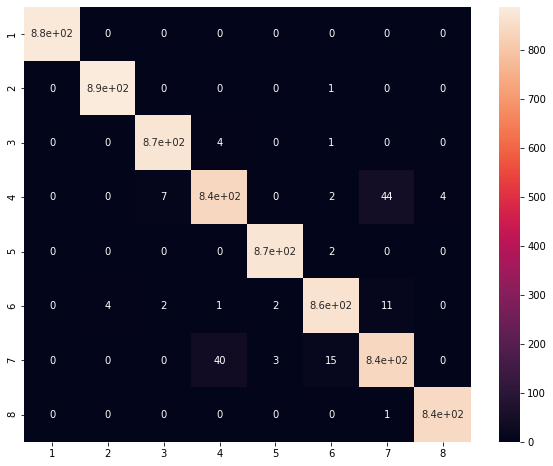

In [36]:
#Model Evalation For Logistic Regression Classification Model
from sklearn.metrics import confusion_matrix
    
#confusion matrix

cm_logreg = confusion_matrix(y_test, y_results_logreg)
array = cm_logreg 
df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [37]:
#accuracy_score, f1_score, recall_score,precision_score metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score
#accuracy
accuracy_logreg = accuracy_score(y_test, y_results_logreg)
print("accuracy:{}".format(accuracy_logreg))
#F1 score    
f1_score_logreg = f1_score(y_test, y_results_logreg, average='weighted')
print("f1_score:{}".format(f1_score_logreg))
#Recall score
recall_score_logreg = recall_score(y_test, y_results_logreg, average='micro')
print("recall_score:{}".format(recall_score_logreg))
#Precision score
precision_score_logreg = precision_score(y_test, y_results_logreg, average='micro')
print("precision_score:{}".format(precision_score_logreg))

accuracy:0.9795454545454545
f1_score:0.9794936341056684
recall_score:0.9795454545454545
precision_score:0.9795454545454545


In [38]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_results_logreg, digits = 8))

              precision    recall  f1-score   support

           1  1.00000000 1.00000000 1.00000000       879
           2  0.99551066 0.99887387 0.99718943       888
           3  0.98979592 0.99430524 0.99204545       878
           4  0.94915254 0.93645485 0.94276094       897
           5  0.99429875 0.99771167 0.99600228       874
           6  0.97624434 0.97734994 0.97679683       883
           7  0.93750000 0.93541203 0.93645485       898
           8  0.99527187 0.99881376 0.99703967       843

    accuracy                      0.97954545      7040
   macro avg  0.97972176 0.97986517 0.97978618      7040
weighted avg  0.97945656 0.97954545 0.97949363      7040



# 4.KNN Classifier

# Model Tuning

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Set the parameters by cross-validation
tuned_parameters = [ {"metric":['euclidean'], "n_neighbors":[5, 10, 20, 50, 100, 200, 250], "weights":['uniform','distance']},
                     {"metric":['manhattan'], "n_neighbors":[5, 10, 20, 50, 100, 200, 250], "weights":['uniform','distance']},
                     {"metric":['chebyshev'], "n_neighbors":[5, 10, 20, 50, 100, 200, 250], "weights":['uniform','distance']}
                     ]
             

print("# Tuning hyper-parameters for KNN Classifier")
print()

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='accuracy', cv = 2)

clf.fit(X_train, y_train)

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full training set.")
print("The scores are computed on the full development set.")
print()
y_true, y_pred = y_dev, clf.predict(X_dev)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for KNN Classifier



KeyboardInterrupt: 

In [39]:
#Best parameters set found on training set:
     #{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

# Training the Model with tuned parameters

In [39]:
from sklearn.neighbors import KNeighborsClassifier
# Training the KNN classfication model on the Training set
classifier_knn = KNeighborsClassifier( metric = 'manhattan', n_neighbors = 5, weights= 'distance')
# fitting the model
classifier_knn.fit(X_train_ovr,y_train_ovr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

# Predicting results for Test set

In [40]:
# Predicting the Test set results
y_results_knn = classifier_knn.predict(X_test)

In [41]:
print(np.concatenate((y_results_knn.reshape(len(y_results_knn),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [8 8]
 [8 8]
 [8 8]]


# Model Evaluation

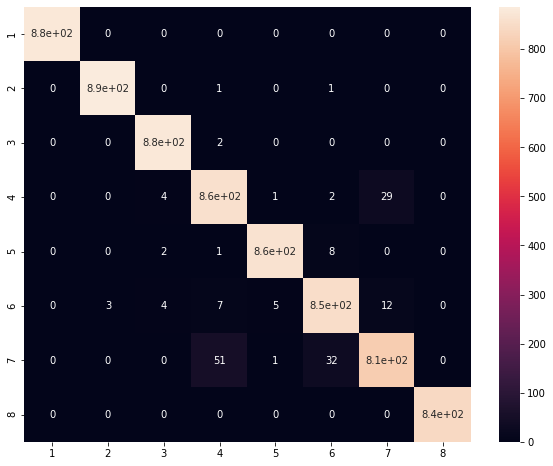

In [42]:
#Model Evalation For Logistic Regression Classification Model
from sklearn.metrics import confusion_matrix
    
#confusion matrix

cm_knn = confusion_matrix(y_test, y_results_knn)
array = cm_knn 
df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [43]:
#accuracy_score, f1_score, recall_score,precision_score metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score
#accuracy
accuracy_knn = accuracy_score(y_test, y_results_knn)
print("accuracy:{}".format(accuracy_knn))
#F1 score    
f1_score_knn = f1_score(y_test, y_results_knn, average='weighted')
print("f1_score:{}".format(f1_score_knn))
#Recall score
recall_score_knn = recall_score(y_test, y_results_knn, average='micro')
print("recall_score:{}".format(recall_score_knn))
#Precision score
precision_score_knn = precision_score(y_test, y_results_knn, average='micro')
print("precision_score:{}".format(precision_score_knn))

accuracy:0.9764204545454546
f1_score:0.9763387227549893
recall_score:0.9764204545454546
precision_score:0.9764204545454546


In [44]:
#Classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_results_knn, digits = 8))

              precision    recall  f1-score   support

           1  1.00000000 1.00000000 1.00000000       879
           2  0.99662542 0.99774775 0.99718627       888
           3  0.98871332 0.99772210 0.99319728       878
           4  0.93282774 0.95986622 0.94615385       897
           5  0.99195402 0.98741419 0.98967890       874
           6  0.95195531 0.96489241 0.95838020       883
           7  0.95204678 0.90645880 0.92869367       898
           8  1.00000000 1.00000000 1.00000000       843

    accuracy                      0.97642045      7040
   macro avg  0.97676532 0.97676268 0.97666127      7040
weighted avg  0.97646627 0.97642045 0.97633872      7040



# 5. Decision Tree Classifier:

# MODEL TUNING

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Set the parameters by cross-validation
tuned_parameters = [{"criterion":["gini","entropy"],"splitter":["best","random"],"max_depth":[10,100,500,1000,50000,10000],
                    "min_samples_split": [2,5,10,15,25,40] , "min_samples_leaf":[1,2,5,10,20]}]
             

print("# Tuning hyper-parameters for Decision Tree Classifier")
print()

clf = GridSearchCV(DecisionTreeClassifier(random_state=0), tuned_parameters, scoring='accuracy', cv = 2)

clf.fit(X_train, y_train)

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full training set.")
print("The scores are computed on the full development set.")
print()
y_true, y_pred = y_dev, clf.predict(X_dev)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for Decision Tree Classifier

Best parameters set found on training set:

{'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}

Grid scores on training set:

0.605 (+/-0.007) for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.636 (+/-0.009) for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.596 (+/-0.017) for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.646 (+/-0.028) for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
0.596 (+/-0.027) for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
0.589 (+/-0.074) for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 

# Training the Model with tuned parameters

In [45]:
from sklearn.tree import DecisionTreeClassifier
# Training the Decision Tree classfication model on the Training set
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 100, min_samples_leaf=1, min_samples_split=2, 
                                       splitter = 'random', random_state= 0)
# fitting the model
classifier_dt.fit(X_train_ovr,y_train_ovr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')

# Predicting results for Test set

In [46]:
# Predicting the Test set results
y_results_dt = classifier_dt.predict(X_test)

In [47]:
print(np.concatenate((y_results_dt.reshape(len(y_results_dt),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [8 8]
 [8 8]
 [8 8]]


# Model Evaluation

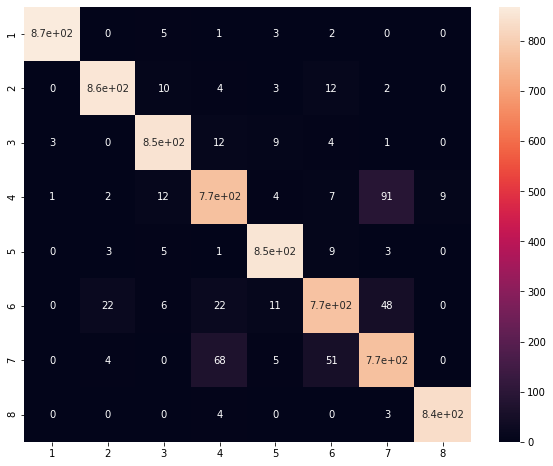

In [48]:
#Model Evalation For Logistic Regression Classification Model
from sklearn.metrics import confusion_matrix
    
#confusion matrix

cm_dt = confusion_matrix(y_test, y_results_dt)
array = cm_dt 
df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [49]:
#accuracy_score, f1_score, recall_score,precision_score metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score
#accuracy
accuracy_dt = accuracy_score(y_test, y_results_dt)
print("accuracy:{}".format(accuracy_dt))
#F1 score    
f1_score_dt = f1_score(y_test, y_results_dt, average='weighted')
print("f1_score:{}".format(f1_score_dt))
#Recall score
recall_score_dt = recall_score(y_test, y_results_dt, average='micro')
print("recall_score:{}".format(recall_score_dt))
#Precision score
precision_score_dt = precision_score(y_test, y_results_dt, average='micro')
print("precision_score:{}".format(precision_score_dt))

accuracy:0.934375
f1_score:0.9343210604517996
recall_score:0.934375
precision_score:0.934375


In [50]:
#Classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_results_dt, digits = 8))

              precision    recall  f1-score   support

           1  0.99541284 0.98748578 0.99143347       879
           2  0.96509009 0.96509009 0.96509009       888
           3  0.95715896 0.96697039 0.96203966       878
           4  0.87315968 0.85953177 0.86629213       897
           5  0.96058559 0.97597254 0.96821793       874
           6  0.90104773 0.87655719 0.88863375       883
           7  0.83877996 0.85746102 0.84801762       898
           8  0.98934911 0.99169632 0.99052133       843

    accuracy                      0.93437500      7040
   macro avg  0.93507300 0.93509564 0.93503075      7040
weighted avg  0.93437505 0.93437500 0.93432106      7040



# 6.Random Forest Classifier:

# MODEL TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Set the parameters by cross-validation
tuned_parameters = [{"criterion":["gini","entropy"],
               'max_depth': [80,  100, 120]}]
               #'n_estimators': [100, 200, 500, 1000, 2000]}]
             

print("# Tuning hyper-parameters for Random Forest Classifier")
print()

clf = GridSearchCV(RandomForestClassifier(random_state=0), tuned_parameters, scoring='accuracy', cv = 2)

clf.fit(X_train, y_train)

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full training set.")
print("The scores are computed on the full development set.")
print()
y_true, y_pred = y_dev, clf.predict(X_dev)
print(classification_report(y_true, y_pred))
print()

# Training the Model with tuned parameters

In [51]:
from sklearn.ensemble import RandomForestClassifier
# Training the random forest classfication model on the Training set
classifier_rf = RandomForestClassifier(random_state=0,criterion = 'gini', max_depth = 80, 
                                       max_features = 'log2', n_estimators = 500)
# fitting the model
classifier_rf.fit(X_train_ovr,y_train_ovr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Predicting results for Test set

In [52]:
# Predicting the Test set results
y_results_rf = classifier_rf.predict(X_test)

In [53]:
print(np.concatenate((y_results_rf.reshape(len(y_results_rf),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [8 8]
 [8 8]
 [8 8]]


# Model Evaluation

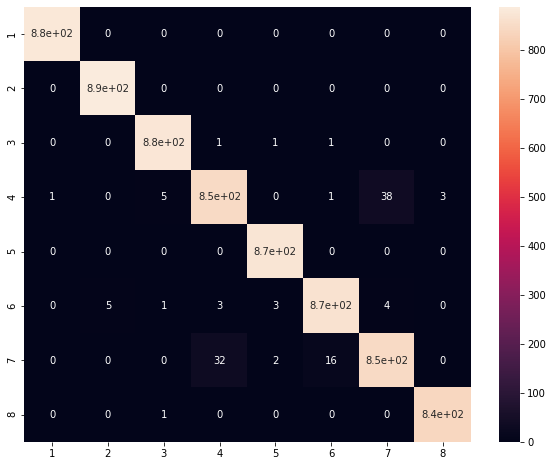

In [54]:
#Model Evalation For Logistic Regression Classification Model
from sklearn.metrics import confusion_matrix
    
#confusion matrix

cm_rf = confusion_matrix(y_test, y_results_rf)
array = cm_rf 
df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [55]:
#accuracy_score, f1_score, recall_score,precision_score metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score
#accuracy
accuracy_rf = accuracy_score(y_test, y_results_rf)
print("accuracy:{}".format(accuracy_rf))
#F1 score    
f1_score_rf = f1_score(y_test, y_results_rf, average='weighted')
print("f1_score:{}".format(f1_score_rf))
#Recall score
recall_score_rf = recall_score(y_test, y_results_rf, average='micro')
print("recall_score:{}".format(recall_score_rf))
#Precision score
precision_score_rf = precision_score(y_test, y_results_rf, average='micro')
print("precision_score:{}".format(precision_score_rf))

accuracy:0.9832386363636364
f1_score:0.9831764040163682
recall_score:0.9832386363636364
precision_score:0.9832386363636364


In [56]:
#Classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_results_rf, digits = 8))

              precision    recall  f1-score   support

           1  0.99886364 1.00000000 0.99943150       879
           2  0.99440090 1.00000000 0.99719259       888
           3  0.99206349 0.99658314 0.99431818       878
           4  0.95932203 0.94648829 0.95286195       897
           5  0.99318182 1.00000000 0.99657925       874
           6  0.97966102 0.98187995 0.98076923       883
           7  0.95280899 0.94432071 0.94854586       898
           8  0.99644970 0.99881376 0.99763033       843

    accuracy                      0.98323864      7040
   macro avg  0.98334395 0.98351073 0.98341611      7040
weighted avg  0.98313692 0.98323864 0.98317640      7040



# 7.Extra Trees

# MODEL TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier

# Set the parameters by cross-validation
tuned_parameters = [ {'criterion': ["gini"],
    'max_depth': [80, 100, 120],
    'max_features': ["auto","log2","sqrt"],
    'n_estimators': [100, 200, 500, 1000]}]
             

print("# Tuning hyper-parameters for Extra Trees Classifier")
print()

clf = GridSearchCV(ExtraTreesClassifier(random_state=0), tuned_parameters, scoring='accuracy', cv = 2)

clf.fit(X_train, y_train)

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full training set.")
print("The scores are computed on the full development set.")
print()
y_true, y_pred = y_dev, clf.predict(X_dev)
print(classification_report(y_true, y_pred))
print()

In [58]:
#Best parameters set found on training set:

    #{'criterion': 'gini', 'max_depth': 80, 'max_features': 'log2', 'n_estimators': 500}

# Training the Model with tuned parameters

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
# Training the random forest classfication model on the Training set
classifier_xt = ExtraTreesClassifier(random_state = 0,n_estimators=500,criterion ='gini', max_depth= 80, 
                                     max_features = 'log2')
# fitting the model
classifier_xt.fit(X_train_ovr,y_train_ovr)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=80, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

# Predicting the Test set results

In [58]:
# Predicting the Test set results
y_results_xt = classifier_xt.predict(X_test)

In [59]:
print(np.concatenate((y_results_xt.reshape(len(y_results_xt),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [8 8]
 [8 8]
 [8 8]]


# Model Evalation

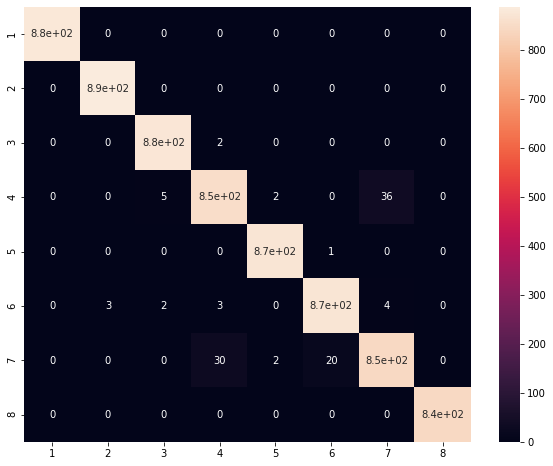

In [60]:
#Model Evalation For Logistic Regression Classification Model
from sklearn.metrics import confusion_matrix
    
#confusion matrix

cm_xt = confusion_matrix(y_test, y_results_xt)
array = cm_xt 
df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [61]:
#accuracy_score, f1_score, recall_score,precision_score metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score
#accuracy
accuracy_xt = accuracy_score(y_test, y_results_xt)
print("accuracy:{}".format(accuracy_xt))
#F1 score    
f1_score_xt = f1_score(y_test, y_results_xt, average='weighted')
print("f1_score:{}".format(f1_score_xt))
#Recall score
recall_score_xt = recall_score(y_test, y_results_xt, average='micro')
print("recall_score:{}".format(recall_score_xt))
#Precision score
precision_score_xt = precision_score(y_test, y_results_xt, average='micro')
print("precision_score:{}".format(precision_score_xt))

accuracy:0.984375
f1_score:0.9843209009220472
recall_score:0.984375
precision_score:0.984375


In [62]:
#Classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_results_xt, digits = 8))

              precision    recall  f1-score   support

           1  1.00000000 1.00000000 1.00000000       879
           2  0.99663300 1.00000000 0.99831366       888
           3  0.99207248 0.99772210 0.99488927       878
           4  0.96062992 0.95206243 0.95632699       897
           5  0.99543900 0.99885584 0.99714449       874
           6  0.97645740 0.98640997 0.98140845       883
           7  0.95485327 0.94209354 0.94843049       898
           8  1.00000000 1.00000000 1.00000000       843

    accuracy                      0.98437500      7040
   macro avg  0.98451063 0.98464298 0.98456417      7040
weighted avg  0.98429241 0.98437500 0.98432090      7040



# SUMMARY

NOTES:
    1. Accuracy is a better metric in indicating the performance in this application as there is negligible class imbalance.
    2. GridSearchCV was used to search through parameters & get the best set of parameters for the above models.
    3. Modified train set i.e train set & dev set were created on which models with tuned parameters were trained.
    4. Finally prediction was done on test set.
    5. Accuracy obtained for different models are as follows:
              1. SVM Classifier --------------------> 99.289%
              2. SGD Classifier --------------------> 96.917%
              3. Logistics Regression Classifier ---> 97.954%
              4. KNN Classifier --------------------> 97.642%
              5. Decision Tree Classifier --------->  93.437%
              6. Random Forest Classifier ----------> 98.323%
              7. Extra Trees Classifier ------------> 98.437%

# ENSEMBLING TECHNIQUES

In [63]:
#1.Voting

In [67]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('lr', classifier_logreg), ('rf', classifier_rf), ('svm', classifier_SVM),
                                     ('dt', classifier_dt),('knn', classifier_knn),('sgd', classifier_SGD),
                                     ('xt', classifier_xt)], voting='hard')
eclf1 = eclf1.fit(X_train_ovr, y_train_ovr)

In [68]:
y_res_1 = eclf1.predict(X_test)

In [69]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_res_1, digits = 8))

              precision    recall  f1-score   support

           1  1.00000000 1.00000000 1.00000000       879
           2  0.99887514 1.00000000 0.99943725       888
           3  0.99319728 0.99772210 0.99545455       878
           4  0.96230599 0.96767001 0.96498054       897
           5  0.99885584 0.99885584 0.99885584       874
           6  0.98089888 0.98867497 0.98477157       883
           7  0.96818182 0.94877506 0.95838020       898
           8  0.99881517 1.00000000 0.99940723       843

    accuracy                      0.98750000      7040
   macro avg  0.98764126 0.98771225 0.98766090      7040
weighted avg  0.98746860 0.98750000 0.98746817      7040



In [ ]:
#not weighted

In [ ]:
eclf2 = VotingClassifier(estimators=[('lr', classifier_logreg), ('rf', classifier_rf), ('svm', classifier_SVM),
                                     ('dt', classifier_dt),('knn', classifier_knn),('sgd', classifier_SGD),
                                     ('xt', classifier_xt)],voting='soft',flatten_transform = True)
eclf2 = eclf2.fit_transform(X_train_ovr,y_train_ovr)

In [ ]:
y_res_2 = eclf2.score(X_test)

In [ ]:
#weights

In [ ]:
eclf3 = VotingClassifier(estimators=[('lr', classifier_logreg), ('rf', classifier_rf), ('svm', classifier_SVM),
                                     ('dt', classifier_dt),('knn', classifier_knn),('sgd', classifier_SGD),
                                     ('xt', classifier_xt)], voting='soft', weights=[1,2,4,1,2,3,2],
                         flatten_transform=True)
eclf3 = eclf3.fit(X_train_ovr, y_train_ovr)

In [ ]:
y_res_3 = eclf3.score(X_test)

In [193]:
#2.Bagging


class sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, *, max_samples=1.0, 
                                         max_features=1.0, bootstrap=True, bootstrap_features=False, 
                                         oob_score=False, warm_start=False, n_jobs=None, random_state=None,
                                         verbose=0)


In [75]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

eclf4 = BaggingClassifier(base_estimator=SVC(),
                         n_estimators=20, random_state=0)
eclf4.fit(X_train_ovr, y_train_ovr)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [76]:
y_res_4=eclf4.predict(X_test)

In [77]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_res_4, digits = 8))

              precision    recall  f1-score   support

           1  1.00000000 1.00000000 1.00000000       879
           2  0.99887514 1.00000000 0.99943725       888
           3  0.99320498 0.99886105 0.99602499       878
           4  0.95264317 0.96432553 0.95844875       897
           5  1.00000000 0.99885584 0.99942759       874
           6  0.98651685 0.99433749 0.99041173       883
           7  0.96575342 0.94209354 0.95377678       898
           8  1.00000000 0.99881376 0.99940653       843

    accuracy                      0.98693182      7040
   macro avg  0.98712420 0.98716090 0.98711670      7040
weighted avg  0.98691719 0.98693182 0.98689819      7040



In [ ]:
#3.Boosting

In [ ]:
#Adaboost

In [134]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
eclf5 = AdaBoostClassifier(base_estimator= classifier_SVM, n_estimators=5, random_state=0,algorithm='SAMME')
eclf5.fit(X_train_ovr, y_train_ovr)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=100, break_ties=False, cache_size=200,
                                      class_weight='balanced', coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma='auto', kernel='rbf', max_iter=-1,
                                      probability=False, random_state=0,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=1.0, n_estimators=5, random_state=0)

In [135]:
y_res_5=eclf5.predict(X_test)

In [137]:
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_test, y_res_5, digits = 8))

              precision    recall  f1-score   support

           1  1.00000000 0.96700796 0.98322730       879
           2  0.99315849 0.98085586 0.98696884       888
           3  0.97823129 0.81890661 0.89150651       878
           4  0.80687563 0.88963211 0.84623542       897
           5  0.88829216 0.94622426 0.91634349       874
           6  0.84199584 0.91732729 0.87804878       883
           7  0.89125296 0.83964365 0.86467890       898
           8  0.98588235 0.99406880 0.98995865       843

    accuracy                      0.91860795      7040
   macro avg  0.92321109 0.91920832 0.91962099      7040
weighted avg  0.92256718 0.91860795 0.91899419      7040



In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
eclf6 = AdaBoostClassifier(base_estimator=LogisticRegression(random_state = 0), n_estimators=10, random_state=0)
eclf6.fit(X_train_ovr, y_train_ovr)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=0,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=10, random_state=0)

In [132]:
y_res_6 = eclf6.predict(X_test)

In [133]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_res_6, digits = 8))

              precision    recall  f1-score   support

           1  1.00000000 0.95221843 0.97552448       879
           2  0.99529412 0.95270270 0.97353280       888
           3  0.94204545 0.94419134 0.94311718       878
           4  0.76481836 0.89186176 0.82346886       897
           5  0.95508274 0.92448513 0.93953488       874
           6  0.80076628 0.94677237 0.86766995       883
           7  0.94151213 0.73496659 0.82551595       898
           8  0.98684211 0.97864769 0.98272781       843

    accuracy                      0.91491477      7040
   macro avg  0.92329515 0.91573075 0.91638649      7040
weighted avg  0.92261135 0.91491477 0.91558956      7040



In [100]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
eclf7 = AdaBoostClassifier(base_estimator=ExtraTreesClassifier(), n_estimators=10, random_state=0)
eclf7.fit(X_train_ovr, y_train_ovr)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_wei

In [101]:
y_res_7=eclf7.predict(X_test)

In [102]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_res_7, digits = 8))

              precision    recall  f1-score   support

           1  1.00000000 1.00000000 1.00000000       879
           2  0.99107143 1.00000000 0.99551570       888
           3  0.98868778 0.99544419 0.99205448       878
           4  0.95715896 0.94648829 0.95179372       897
           5  0.99430524 0.99885584 0.99657534       874
           6  0.97075366 0.97734994 0.97404063       883
           7  0.94802260 0.93429844 0.94111049       898
           8  0.99881235 0.99762752 0.99821958       843

    accuracy                      0.98096591      7040
   macro avg  0.98110150 0.98125803 0.98116374      7040
weighted avg  0.98085685 0.98096591 0.98089514      7040



In [108]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
eclf8 = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(), n_estimators=20, random_state=0)
eclf8.fit(X_train_ovr, y_train_ovr)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [109]:
y_res_8 = eclf8.predict(X_test)

In [110]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_res_8, digits = 8))

              precision    recall  f1-score   support

           1  0.99659478 0.99886234 0.99772727       879
           2  0.97321429 0.98198198 0.97757848       888
           3  0.97291196 0.98177677 0.97732426       878
           4  0.85474860 0.85284281 0.85379464       897
           5  0.97729852 0.98512586 0.98119658       874
           6  0.91118800 0.89467724 0.90285714       883
           7  0.84845133 0.85412027 0.85127636       898
           8  0.99036145 0.97508897 0.98266587       843

    accuracy                      0.93991477      7040
   macro avg  0.94059612 0.94055953 0.94055258      7040
weighted avg  0.93986779 0.93991477 0.93986628      7040



In [ ]:
#4.Stacking

In [ ]:
#StackingClassifier(estimators, final_estimator=None, *, cv=None, stack_method='auto',n_jobs=None, passthrough=False, verbose=0)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
estimators = [('rf', classifier_rf), ('svm', classifier_SVM),('dt', classifier_dt),
              ('knn', classifier_knn),('xt', classifier_xt)]
eclf9 = StackingClassifier(estimators, final_estimator= LogisticRegression() , stack_method='predict')
eclf9.fit(X_train_ovr, y_train_ovr)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=80,
                                                       max_features='log2',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                       

In [95]:
y_res_9 = eclf9.predict(X_test)

In [96]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_res_9, digits = 8))

              precision    recall  f1-score   support

           1  1.00000000 0.98748578 0.99370349       879
           2  0.98754247 0.98198198 0.98475438       888
           3  0.97770346 0.99886105 0.98816901       878
           4  0.96714129 0.98439242 0.97569061       897
           5  0.96559378 0.99542334 0.98028169       874
           6  0.89989350 0.95696489 0.92755214       883
           7  0.98002497 0.87416481 0.92407298       898
           8  1.00000000 0.99406880 0.99702558       843

    accuracy                      0.97130682      7040
   macro avg  0.97223743 0.97166788 0.97140624      7040
weighted avg  0.97208586 0.97130682 0.97114190      7040

